In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step


In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test=y_test.reshape(-1,)

In [ ]:
classes=[ 'airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

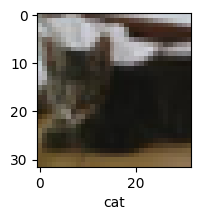

In [ ]:
plot_sample(X_train, y_train ,9)

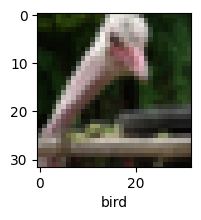

In [ ]:
plot_sample(X_train,y_train,502)

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

ann.compile(optimizer = 'SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 134s 84ms/step - loss: 1.8110 - accuracy: 0.3553
Epoch 2/20
1563/1563 [==============================] - 128s 82ms/step - loss: 1.6224 - accuracy: 0.4274
Epoch 3/20
1563/1563 [==============================] - 132s 84ms/step - loss: 1.5414 - accuracy: 0.4565
Epoch 4/20
1563/1563 [==============================] - 146s 93ms/step - loss: 1.4801 - accuracy: 0.4809
Epoch 5/20
1563/1563 [==============================] - 135s 87ms/step - loss: 1.4317 - accuracy: 0.4962
Epoch 6/20
1563/1563 [==============================] - 130s 83ms/step - loss: 1.3886 - accuracy: 0.5104
Epoch 7/20
1563/1563 [==============================] - 132s 85ms/step - loss: 1.3490 - accuracy: 0.5247
Epoch 8/20
1563/1563 [==============================] - 134s 86ms/step - loss: 1.3168 - accuracy: 0.5364
Epoch 9/20
1563/1563 [==============================] - 130s 83ms/step - loss: 1.2829 - accuracy: 0.5478
Epoch 10/20
1563/1563 [==============================] 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred= ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report :\n',classification_report(y_test,y_pred_classes))

313/313 [==============================] - 11s 34ms/step
classification report :
               precision    recall  f1-score   support

           0       0.76      0.31      0.44      1000
           1       0.79      0.49      0.61      1000
           2       0.37      0.54      0.44      1000
           3       0.33      0.37      0.35      1000
           4       0.66      0.24      0.35      1000
           5       0.38      0.57      0.45      1000
           6       0.59      0.60      0.60      1000
           7       0.45      0.75      0.56      1000
           8       0.67      0.65      0.66      1000
           9       0.63      0.56      0.59      1000

    accuracy                           0.51     10000
   macro avg       0.56      0.51      0.51     10000
weighted avg       0.56      0.51      0.51     10000



In [ ]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

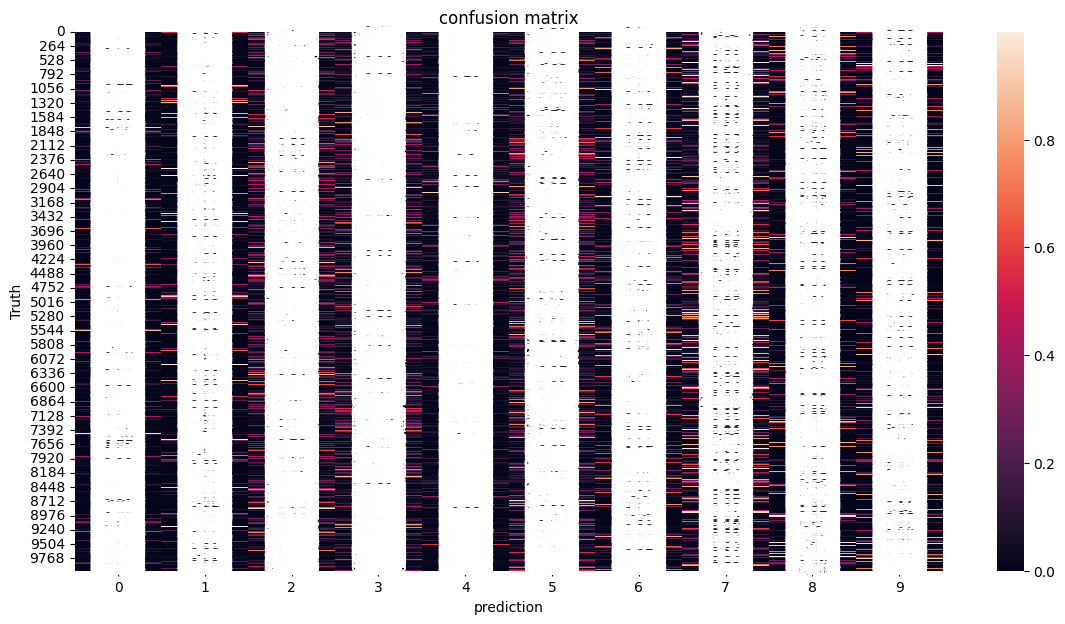

In [ ]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred,annot=True)
plt.ylabel('Truth')
plt.xlabel('prediction')
plt.title('confusion matrix')
plt.show

In [ ]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')

])

In [ ]:
cnn.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.3722 - accuracy: 0.8672
Epoch 2/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.3518 - accuracy: 0.8739
Epoch 3/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.3365 - accuracy: 0.8796
Epoch 4/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.3162 - accuracy: 0.8864
Epoch 5/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.3010 - accuracy: 0.8913
Epoch 6/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.2849 - accuracy: 0.8961
Epoch 7/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.2739 - accuracy: 0.9004
Epoch 8/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.2610 - accuracy: 0.9066
Epoch 9/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.2460 - accuracy: 0.9108
Epoch 10/20
1563/1563 [==============================] - 53s 34m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 2.2349 - accuracy: 0.6731


[2.2348523139953613, 0.6730999946594238]

In [ ]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[3.26980939e-18, 5.80890130e-21, 7.61509605e-12, 9.99678493e-01,
        1.09511022e-12, 3.21359897e-04, 1.06943666e-07, 8.06608876e-14,
        5.88821953e-19, 1.51853817e-19],
       [6.80500374e-14, 2.39954145e-09, 8.48623982e-24, 3.12867916e-20,
        2.71296573e-31, 1.37158770e-27, 4.00300966e-23, 4.84669756e-28,
        9.99999940e-01, 1.19067842e-13],
       [3.93455912e-06, 1.53699398e-01, 3.42131629e-10, 1.67617458e-03,
        4.38684040e-08, 9.17680987e-10, 5.55343540e-08, 2.90501290e-10,
        8.15745413e-01, 2.88749654e-02],
       [9.99999225e-01, 4.27160640e-10, 1.94236719e-07, 6.87107231e-14,
        9.81325670e-08, 4.44982671e-16, 3.67391495e-14, 8.82321610e-15,
        3.21555717e-07, 6.53203349e-14],
       [2.31193391e-17, 2.85519793e-15, 1.04271180e-07, 1.08320761e-04,
        5.64376945e-09, 5.15709216e-05, 9.99840021e-01, 1.09472465e-17,
        4.93806047e-17, 8.93161501e-17]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

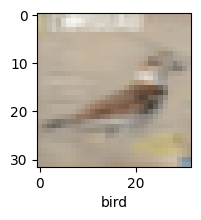

In [ ]:
plot_sample(X_test,y_test,70)

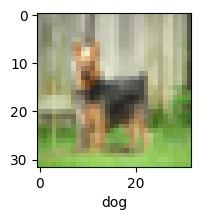

In [ ]:
plot_sample(X_test,y_test,24)

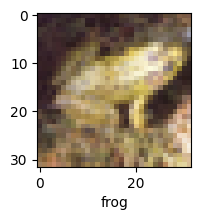

In [ ]:
plot_sample(X_test,y_test,19)

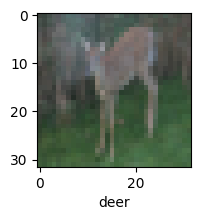

In [ ]:
plot_sample(X_test,y_test,94)

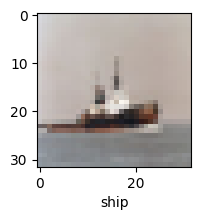

In [ ]:
plot_sample(X_test,y_test,72)

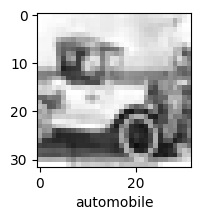

In [ ]:
plot_sample(X_test,y_test,37)

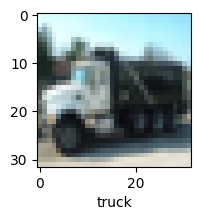

In [ ]:
plot_sample(X_test,y_test,175)

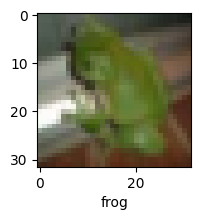

In [ ]:
plot_sample(X_test,y_test,7)

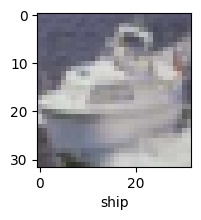

In [ ]:
plot_sample(X_test,y_test,199)

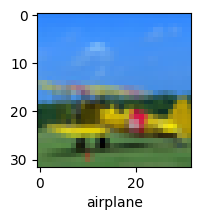

In [ ]:
plot_sample(X_test,y_test,44)

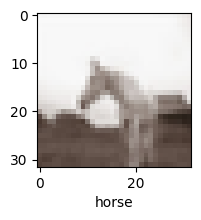

In [ ]:
plot_sample(X_test,y_test,87)

In [ ]:
classes[y_classes[4]]

'frog'

In [ ]:
classes[y_classes[77]]

'cat'

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
classes[y_classes[12]]

'dog'

In [ ]:
classes[y_classes[117]]

'deer'

In [ ]:
classes[y_classes[179]]

'airplane'

In [ ]:
classes[y_classes[112]]

'airplane'

In [ ]:
classes[y_classes[115]]

'cat'